

# Project: Brazil Medical Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project deals with the data analysis of No-Show medical appointments in Brazil. This dataset collects information
from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patients are included in each row. 

Some of the features such as Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received are the factors and variables that can be used to illustrate if a patient would show up for their scheduled appointment. 

The predicted variable with is the 'No-show' indicates whether the patient dis not show up for the appointment in terms of 'Yes' or 'No'.

Hence the study in this section imports the dataset itself and downloads packages that are necessary for exploring the dataset analytically and illustratively

<a id='intro'></a>
### Research Question

This data analysis project seeks to understand important factors that could influence the prediction of a patient attending their scheduled medical appointment in Brazil. Furthermore, it is hoped that the statistical results from this analysis would provide necessary information for the modification of brazilian medical practices and policies especially in the areas covered in the dataset.  

In [157]:
#import data analysis packages and library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#settings of the seaborn packages and libraries
sns.set_context('paper')
sns.set(style='white')
sns.set_theme(style='whitegrid')

In [158]:
#read in the No-show apppointment dataset excel sheet
df = pd.read_excel('C:\\Users\\omoni\\OneDrive\\Desktop\\Practice\\ALX_Udacity\\UdacityProject\\Brazil_Medical_Data.xlsx')
#view the top 5 rows of the dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **NOTE**: In this report section, the No-show appointments loaded dataset is assessed and preprocessed. This is done by checking for cleanliness in terms if null values, duplicates and extreme outliers. Performing these actions would  for efficient data exploration, analysis and generation of insights.

#### Data Preprocessing

In [159]:
#df.shape #to find out about the shape of the dataset
#df.info() #to find out about the data type and null state of data features
#df.duplicated().sum() #to find out if there are duplicated rows in the dataset
#df.isnull().sum() #to find out if there are null values in the dataset

From the simple overview of data assessment exercise done above, results shows that the datasets downloaded is quite clean and there are no null, missing and duplicated values. Hence a more detailed assessment check is done below

In [160]:
df.describe() #provide a statistical description of numeric data in the dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [161]:
#Correct an error that states that someone's Age is -1
df.at[99832, 'Age'] = 0

In [162]:
#The appointment day and scheduled day are objects datatypes and is needed to be converted or edited  
df.AppointmentDay[10]
df.ScheduledDay[0]

'2016-04-29T18:38:08Z'

In [163]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [164]:
df['Neighbourhood'].nunique()

81

> **NOTE**: Preprocessing checks on each dataset columns as shown above, shows that some of the values of the dataset features would need to be cleaned, for example - the appointment day and scheduled day. Also, assessment of of the columns indicate that an outlier in 'Age' would need to be cleaned as no one can have a '-1' age.
Hence, below is the data set cleaning stage where these data value errors are ratified 

### Data Cleaning 

In [165]:
#Split the ScheduleDay into year, month and day and time and create new columns as applicable  
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['Appointment_date'] = df['AppointmentDay'].dt.date
df['Appointment_year'] = df['AppointmentDay'].dt.year
df['Appointment_month'] = df['AppointmentDay'].dt.strftime('%B')
df['Appointment_day'] = df['AppointmentDay'].dt.strftime('%A')

In [166]:
#Split the ScheduleDay into year, month and day and time and create new columns as applicable  
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['Scheduled_date'] = df['ScheduledDay'].dt.date
df['Scheduled_year'] = df['ScheduledDay'].dt.year
df['Scheduled_month'] = df['ScheduledDay'].dt.strftime('%B')
df['Scheduled_day'] = df['ScheduledDay'].dt.strftime('%A')

In [167]:
#drop old and unncessary columns 
df.drop(columns=['ScheduledDay', 'AppointmentDay', 'PatientId'], inplace=True)

In [168]:
#Include new and useful columns
columns_names = ['AppointmentID','Scheduled_date','Scheduled_year', 'Scheduled_month', 'Scheduled_day', 'Appointment_date','Appointment_year', 'Appointment_month', 'Appointment_day','Gender', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show']
df = df.reindex(columns=columns_names)

In [169]:
#Rebranded dataset frame
df.tail()

,AppointmentID,Scheduled_date,Scheduled_year,Scheduled_month,Scheduled_day,Appointment_date,Appointment_year,Appointment_month,Appointment_day,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,5651768,2016-05-03,2016,May,Tuesday,2016-06-07,2016,June,Tuesday,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,5650093,2016-05-03,2016,May,Tuesday,2016-06-07,2016,June,Tuesday,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,5630692,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,5630323,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,5629448,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,54,MARIA ORTIZ,0,0,0,0,0,1,No


> **NOTE**: The above revised dataframe (df) shows the outcome of the data cleaning exercise done in ensuring the dataset is good enough to be analysed. Hence, we can now proceed to the conduct proper data analysis on the dataset

<a id='eda'></a>
## Exploratory Data Analysis

> **NOTE**: With the dataset cleaned and trimmed, this stage entails the computation of statistics and creation of  visualizations with the goal of addressing the research questions that posed in the introduction section - In determining the factors that can help predict if a patient would show up for their scheduled appointment. In this section, we would examine systematically how each key feature in the dataset influences the No-show appointment status. Also, relationships between variables can than be further analysed

### Research Question 1 (Gender distribution)

In [170]:
#functions to prevent repetitive coding

def groupby_plot(df, var, option):
    #This function preforms a groupby function and makes plot output based on the following inputs;
    # df - input dataframe
    # var - dataframe features to be considered
    # option - choice on plot type and specification either counts or normalize(percentage)
    
    if type(var) == list: #if there are more than one objects
        if option == 'Normalize': #option for normalize or count
            df.groupby(var)['No-show'].value_counts(normalize=True).unstack('No-show').mul(100)['Yes'].unstack(var[0]).plot.barh(edgecolor='black', figsize=[10,6], rot=0, width=0.8)
        elif option == 'Counts':
            df.groupby(var)['No-show'].value_counts().unstack('No-show').mul(100)['Yes'].unstack(var[0]).plot.barh(edgecolor='black', figsize=[10,6], rot=0, width=0.8)

        # string concatenate variable names
        xVars = ' & '.join(var)
        # add title and format 
        plt.title(f'Effect of {xVars} on Patients No-show Attendance'.title(), fontsize=14, weight='bold')
        #Add x label and format it
        plt.xlabel('Percentage'.title(), fontsize=10, weight='bold')
        #Add y label and format it
        plt.ylabel(xVars.title(), fontsize=10, weight='bold')
            
            
    else:  #if there is only one object
        if option == 'Normalize':
            df.groupby(var)['No-show'].value_counts(normalize=True).unstack('No-show').mul(100)['Yes'].plot.barh(edgecolor='black', figsize=[10,6], rot=0, width=0.8)
        elif option == 'Counts':
            df.groupby(var)['No-show'].value_counts().unstack('No-show').mul(100)['Yes'].plot.barh(edgecolor='black', figsize=[10,6], rot=0, width=0.8)
    
        # add title and format 
        plt.title(f'The total number of patients No-show Attendance with respect to their {var}'.title(), fontsize=14, weight='bold')
        #Add x label and format it
        plt.xlabel('Percentage'.title(), fontsize=10, weight='bold')
        #Add y label and format it
        plt.ylabel(var.title(), fontsize=10, weight='bold')

    

> **NOTE**:For the first research analysis question, we would like to analyse what is the statistics on the type of patient gender that showed up for their appointment or those that didnt based on the time period given in the dataset.

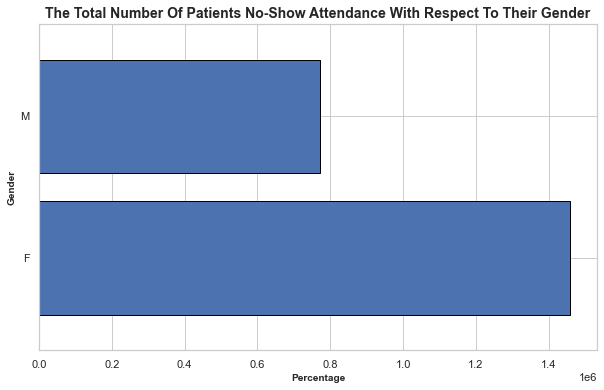

In [171]:
groupby_plot(df,'Gender', 'Counts')

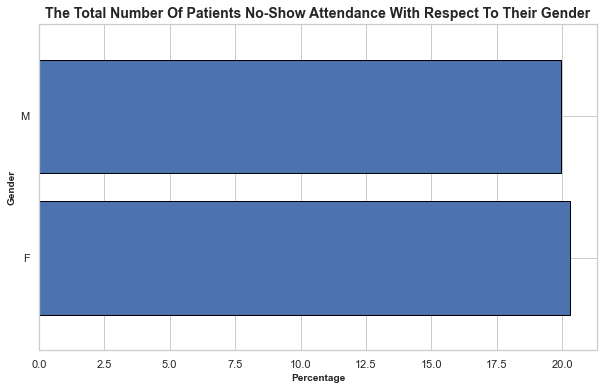

In [172]:
groupby_plot(df,'Gender', 'Normalize')

> **RESULTS**: From the above results, it can be seen that females had appointments during the time period of the datset than the number of men. However, we need to find out what percentage of the female did not show up compared to men and what percentage showed up via numerical statistics. This question is answered as seen in the cell above, results shows that despite the large number of female appointment, the no-show percentage difference between the the female and male gender is about 0.3%  

### Research Question 2  (Age Distribution)

> **NOTE**:For the second research analysis question, we would like to analyse what is the statistics on the Age of patients that showed up for their appointment or those that didnt based on the time period given in the dataset. In this section, the 'Age' of each patient is categorized into four levels - 'child' (0-18), 'youth'(18-30), 'adult'(37-60) and 'elder'(60-115). This makes it easy for the dataset to be analysed categorically.

In [173]:
#Analyse the dataset age distribution
Age_df = df
Age_df['Age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [174]:
#Categorize the dataset into the age-related categories of child, youth, adult and elder
ages = [-1,18,30,60,115]
age_cat = ['Child','Youth','Adult','Elder']
Age_df['Age_cat'] = pd.cut(df['Age'], bins=ages, labels=age_cat)
Age_df.tail()

,AppointmentID,Scheduled_date,Scheduled_year,Scheduled_month,Scheduled_day,Appointment_date,Appointment_year,Appointment_month,Appointment_day,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat
110522,5651768,2016-05-03,2016,May,Tuesday,2016-06-07,2016,June,Tuesday,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110523,5650093,2016-05-03,2016,May,Tuesday,2016-06-07,2016,June,Tuesday,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110524,5630692,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,Youth
110525,5630323,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,Adult
110526,5629448,2016-04-27,2016,April,Wednesday,2016-06-07,2016,June,Tuesday,F,54,MARIA ORTIZ,0,0,0,0,0,1,No,Adult


In [175]:
#re-arrang the dataset columns
columns_names = ['AppointmentID','Scheduled_date','ScheduledDay_Year', 'ScheduledDay_Month', 'ScheduledDay_Day', 'ScheduledDay_Time', 'Appointment_date','AppointmentDay_Year', 'AppointmentDay_Month', 'AppointmentDay_Day','Gender', 'Age', 'Age_cat','Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show']
Age_df = Age_df.reindex(columns=columns_names)

Text(0.5, 1.0, 'plot dataset age distribution')

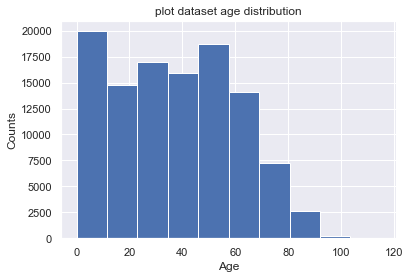

In [198]:
#plot dataset age distribution using histogram
Age_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('plot dataset age distribution')

Text(0.5, 1.0, 'Boxplot of age distribution')

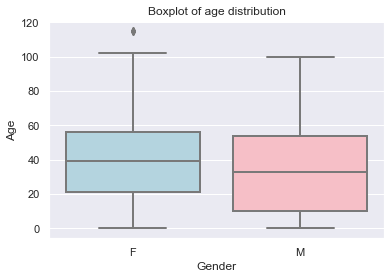

In [199]:
#Plot the age distribution using boxplot
sns.boxplot(x="Gender", y="Age", data=Age_df,
               palette=["lightblue", "lightpink"], linewidth=2);
plt.title('Boxplot of age distribution')

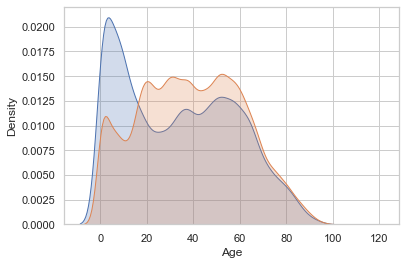

In [178]:
#Plot the dataset age distribution using Kde to show the spread of ages
sns.kdeplot(Age_df.Age[Age_df.Gender=='M'], label='Male', shade=True) #blue color
sns.kdeplot(Age_df.Age[Age_df.Gender=='F'], label='Female', shade=True) #orange color
plt.xlabel('Age')
plt.show()

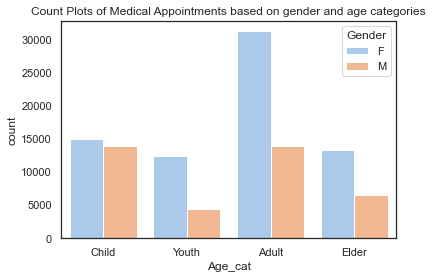

In [179]:
#Additional Seaborn plot settings
sns.set_context('paper')
sns.set(style='white')

#Plot the dataset age bar chart distribution using respect to the age categories 
sns.countplot(x = Age_df['Age_cat'], hue=Age_df['Gender'], data=Age_df, palette='pastel', edgecolor='w')
plt.title('Count Plots of Medical Appointments based on gender and age categories')
plt.show()

> **RESULTS**: From the above results, it can be seen that generally, the mean age of patients is 37 years and that age categories with more participants are children and adults. In addition, most of the males participants are children with few number of youths. While for the females, mosts of the participants are youths and adults.  

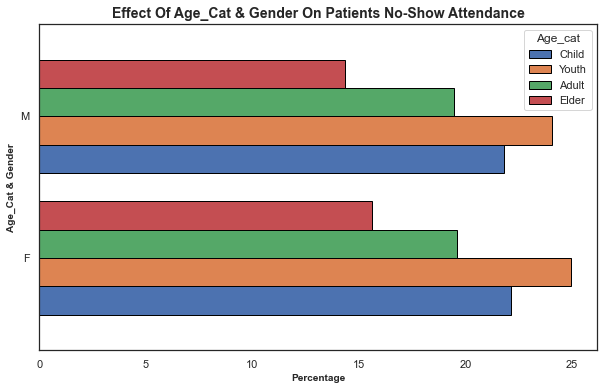

In [180]:
#plot of the percentage effect of age_cat and gender on patient no-show attendence
groupby_plot(df,['Age_cat','Gender'], 'Normalize')

> **RESULTS**: From the plot above, it can be seen based on No-show appointments that male youths are less interested in making medical appointment commitments. While male elders are the largest percentage of medical appointees with the most likely to show-up for appointment. 

### Research Question 3  (Location)

> **NOTE**:For the third research analysis question, we would like to analyse what is the statistics on the neighbourhood location of patients that showed up for their appointment or those that didnt based on the time period given in the dataset. This would enable us know if location is a factor in predicting if a patient would show up for appointment

In [181]:
#Generate a new dataframe
Location_df = df
Location_df['Age_cat'] = Age_df['Age_cat']

In [182]:
#Identify the unique numbers of Neighbourhood places
Location_df['Neighbourhood'].nunique()

81

In [183]:
df_NoShow = df[df['No-show']=='Yes']

In [184]:
#Determine the percentage of location where patients did not show up
Location_NoShow = df_NoShow.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False)
Location_df1 = Location_df.groupby('Neighbourhood')['No-show'].count()
Location_NoShow_percent = np.round((Location_NoShow/Location_df1)*100, decimals=1)
Location_NoShow_percent = Location_NoShow_percent.sort_values(ascending=False)
Location_NoShow_percent

Neighbourhood
ILHAS OCEÃ‚NICAS DE TRINDADE    100.0
SANTOS DUMONT                    28.9
SANTA CECÃLIA                   27.5
SANTA CLARA                      26.5
ITARARÃ‰                         26.3
                                ...  
SOLON BORGES                     14.7
MÃRIO CYPRESTE                  14.6
AEROPORTO                        12.5
ILHA DO BOI                       8.6
PARQUE INDUSTRIAL                 NaN
Name: No-show, Length: 81, dtype: float64

Text(0.5, 0, 'No-Show percentage (%)')

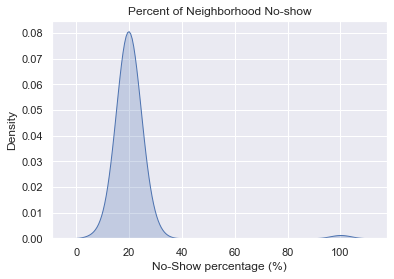

In [185]:
#Show the percentage distribution of neighbourhood likely to affect patients not turning up for their appointment
sns.set_theme()
sns.color_palette()
sns.kdeplot(data=Location_NoShow_percent, shade=True)
plt.title('Percent of Neighborhood No-show')
plt.xlabel('No-Show percentage (%)')

> **RESULTS**: From the plot and statistical output above, it can be seen that apart from ILHAS OCEÃ‚NICAS DE TRINDADE and PARQUE INDUSTRIAL locations, the relative probability of patients from the other 79 locational note turning up is about 20%. if you are from ILHAS OCEÃ‚NICAS DE TRINDA, you are most likely not to turn up. if you are from PARQUE INDUSTRIAL, you are more likely to turn up

### Research Question 4  (Time of day)

> **NOTE**:For the fourth research analysis question, we would like to analyse what is the statistics on the time of appointment and when the schedule was made and how this affects patients from not showing up for their appointment. This would enable us know if location is a factor in predicting if a patient would show up for appointment

In [186]:
#Develop a twin dataframe and groupby appointment year
Time_df = df
df.head()

,AppointmentID,Scheduled_date,Scheduled_year,Scheduled_month,Scheduled_day,Appointment_date,Appointment_year,Appointment_month,Appointment_day,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat
0,5642903,2016-04-29,2016,April,Friday,2016-04-29,2016,April,Friday,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Elder
1,5642503,2016-04-29,2016,April,Friday,2016-04-29,2016,April,Friday,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,5642549,2016-04-29,2016,April,Friday,2016-04-29,2016,April,Friday,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Elder
3,5642828,2016-04-29,2016,April,Friday,2016-04-29,2016,April,Friday,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,5642494,2016-04-29,2016,April,Friday,2016-04-29,2016,April,Friday,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


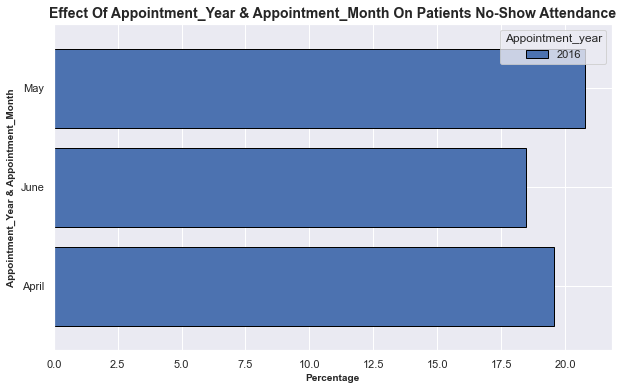

In [187]:
groupby_plot(Time_df,['Appointment_year', 'Appointment_month'], 'Normalize')

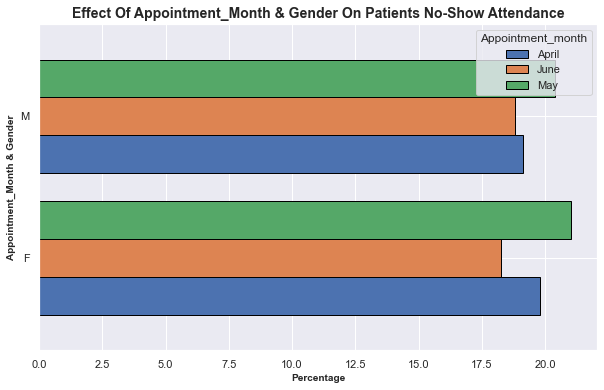

In [188]:
groupby_plot(Time_df,['Appointment_month', 'Gender'], 'Normalize')

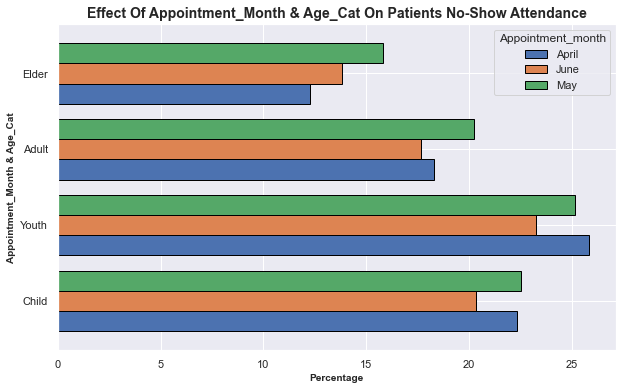

In [189]:
groupby_plot(Time_df,['Appointment_month', 'Age_cat'], 'Normalize')

C:\Users\omoni\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\omoni\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


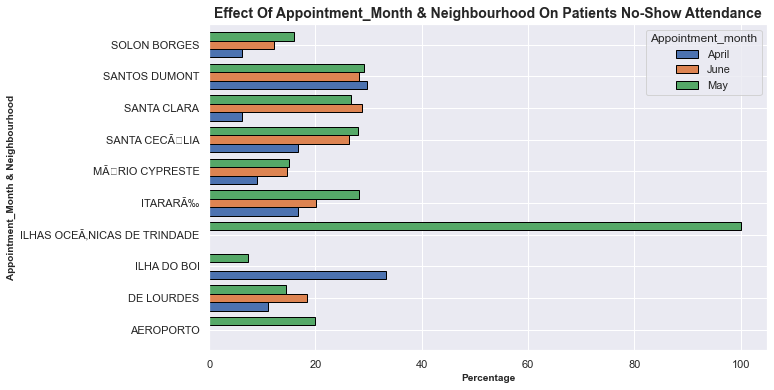

In [190]:
#Plot location and appointment month contribution to patients not-showing up
key_locations = list(Location_NoShow_percent.index[0:5]) + list(Location_NoShow_percent.index[-6:-1])
Time_location= Time_df[Time_df['Neighbourhood'].isin(key_locations)]
groupby_plot(Time_location,['Appointment_month', 'Neighbourhood'], 'Normalize')

> **RESULTS**: From the plot and statistical output above,More patients are appointed to come for medical exercise mostly in May 2016 than in April or less likely in June. Asides this it can be seen that the time of appointment doe not greatly contribute to patients not showing up. However, there is need for more information on the time length of appointment booking, so that 'scheduledDay' as given can be used determine if it is a factor in predicting if the patient would show up 

### Research Question 2  (Extra Analysis)

In [191]:
#Derived dataframe
df2 = Age_df
df2.head()

,AppointmentID,Scheduled_date,ScheduledDay_Year,ScheduledDay_Month,ScheduledDay_Day,ScheduledDay_Time,Appointment_date,AppointmentDay_Year,AppointmentDay_Month,AppointmentDay_Day,...,Age,Age_cat,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,2016-04-29,NaN,NaN,NaN,NaN,2016-04-29,NaN,NaN,NaN,...,62,Elder,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,2016-04-29,NaN,NaN,NaN,NaN,2016-04-29,NaN,NaN,NaN,...,56,Adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,2016-04-29,NaN,NaN,NaN,NaN,2016-04-29,NaN,NaN,NaN,...,62,Elder,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,2016-04-29,NaN,NaN,NaN,NaN,2016-04-29,NaN,NaN,NaN,...,8,Child,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,2016-04-29,NaN,NaN,NaN,NaN,2016-04-29,NaN,NaN,NaN,...,56,Adult,JARDIM DA PENHA,0,1,1,0,0,0,No


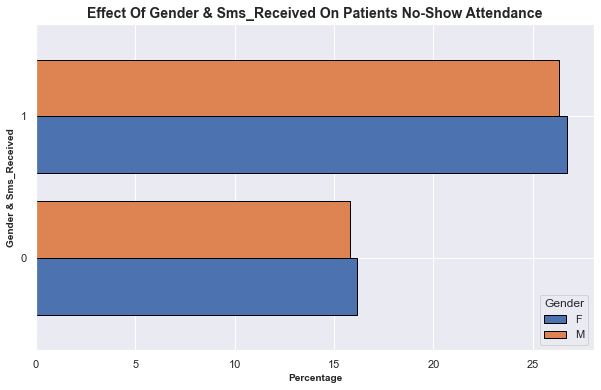

In [192]:
#Consider the impact of the other features like "Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received"
#the impact of the child age-category is omitted, as it has relatively no impact
except1 = ['Youth', 'Adult', 'Elder']
df3= df2[df2['Age_cat'].isin(except1)]

#impact of gender and sms recievd on no-show
groupby_plot(df3,['Gender', 'SMS_received'], 'Normalize')

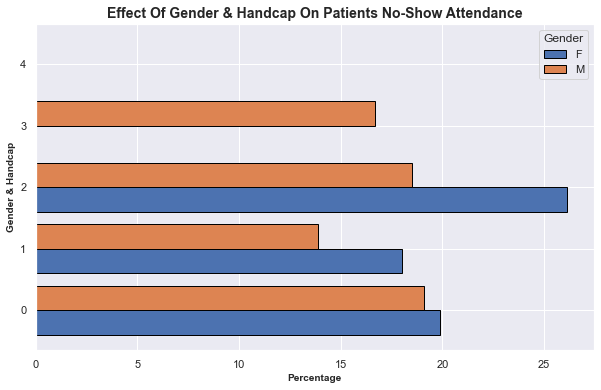

In [193]:
#impact on gender and handcap on no-show
groupby_plot(df3,['Gender', 'Handcap'], 'Normalize')

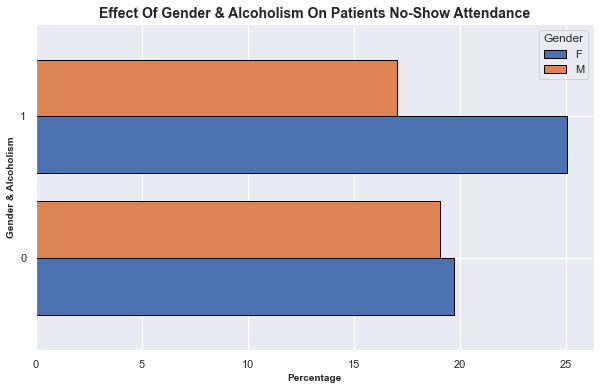

In [194]:
#impact of gender and alcoholism on no-show
groupby_plot(df3,['Gender', 'Alcoholism'], 'Normalize')

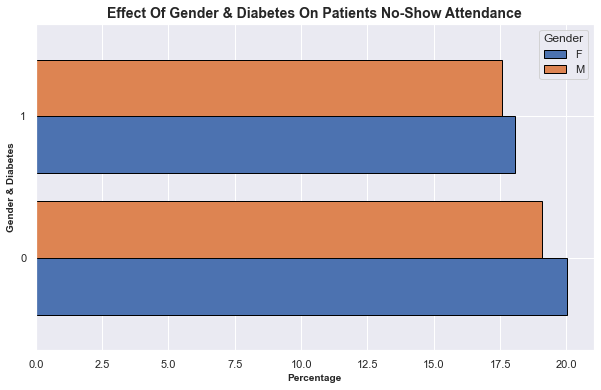

In [195]:
#impact of gender and diabetes on no-show
groupby_plot(df3,['Gender', 'Diabetes'], 'Normalize')

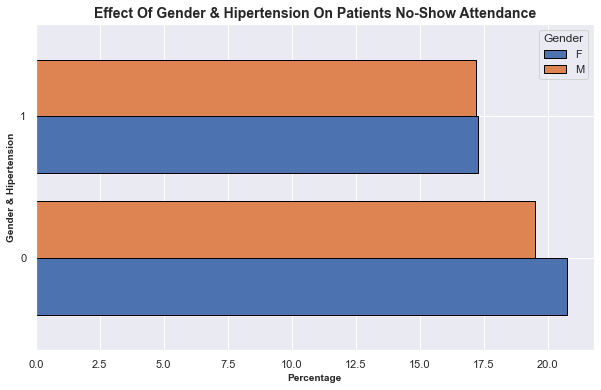

In [196]:
#impact of gender and hypertension on no-show
groupby_plot(df3,['Gender', 'Hipertension'], 'Normalize')

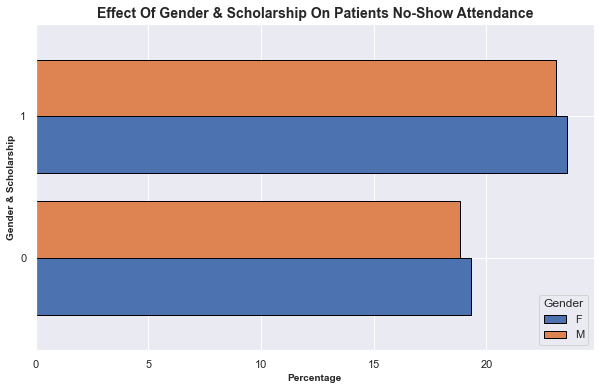

In [197]:
#impact of gender and scholarship on no-show
groupby_plot(df3,['Gender', 'Scholarship'], 'Normalize')

> **RESULTS**: From the plot and statistical output above, It can be seen sms recieved has an impact on both gender showing up for the appointment particularly the males. The rest of the feature do not have an appreciable impact or factor in imfluence whether patients would turn up for medical appointments or not.

<a id='conclusions'></a>
## Conclusions

> **FINAL RESULTS**: It can be observed generally that 0.3% more females would not show up for medical appointments than male. however, this may not be entirelt true, as the dataset is imbalance and contains far more female IDs than males IDs. In fact most of the males are between the ages of 0-18(children) while the females are mostly adults (30-60). 
 
>On a probability basis, the male youths are far more likely not to show up for appointment even with the less number of appointments than any other age-categories while the female adults are more likely to show up for medical appointment in brazil

>it can be seen that apart from ILHAS OCEÃ‚NICAS DE TRINDADE and PARQUE INDUSTRIAL locations, the relative probability of patients from the other 79 locational note turning up is about 20%. if you are from ILHAS OCEÃ‚NICAS DE TRINDA, you are most likely not to turn up. if you are from PARQUE INDUSTRIAL, you are more likely to turn up

>More patients are appointed to come for medical exercise mostly in May 2016 than in April or less likely in June. Asides this it can be seen that the time of appointment doe not greatly contribute to patients not showing up. However, there is need for more information on the time length of appointment booking, so that 'scheduledDay' as given can be used determine if it is a factor in predicting if the patient would show up

>Also, SMS recieved has an impact on both gender showing up for the appointment particularly the males. The rest of the feature do not have an appreciable impact or factor in imfluence whether patients would turn up for medical appointments or not

> **LIMITATIONS**: More information is required to be provided as regards the 'ScheduledDay' which would inform the timeline a booking is done to the day of apppointment. Hence, 'ScheduledDay' details can be deployed and wrangled in understanding if this a factor for patients showing up for medical appointment. Also, more data should be supplied for a standard/longer period of time range. So that the insights culled from the data analysis can be more accurate. As the information we have as regards the timelines (AppointmentDay and scheduleDay) are skewed  